In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pprint import pprint
import importlib
import utils_threshold
import utils_markov 

# Markov Model

In [2]:
datain = pd.read_csv("datasets/csv6.csv")
datain['Date'] = pd.to_datetime(datain['Date'])
datain = datain.set_index('Date')
datalist = datain['Value'].to_numpy()
dsize = datalist.size
dsize

770

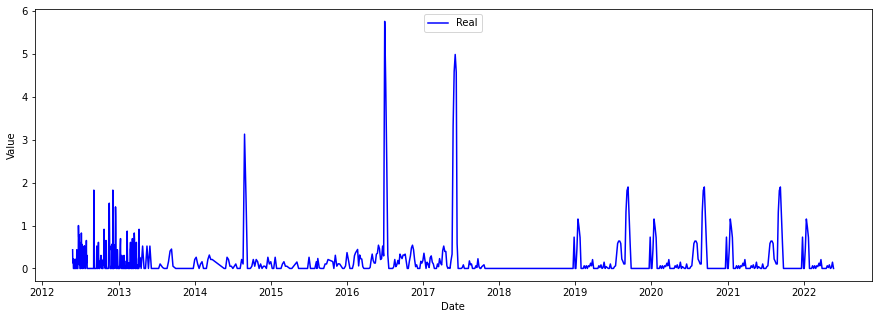

In [56]:
x_axis = np.arange(dsize)
plt.figure(figsize=(15,5))
plt.plot(datain["Value"], color="b", label="Real")
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc=9)
plt.savefig('fig.png')

In [4]:
importlib.reload(utils_threshold)
importlib.reload(utils_markov)

thresholds = np.array([0. , 0.2, 0.5, 1])
order = 1
markov, observed_states, states_dict, _ = utils_threshold.avg_markov_from_data(1, 
                                                            datalist, thresholds, 
                                                           noise_mean=0, noise_variance=0)

markov, states_dict

(array([[1.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.8384755 , 0.1107078 , 0.0399274 , 0.01088929],
        [0.        , 0.51666667, 0.3       , 0.13333333, 0.05      ],
        [0.        , 0.37142857, 0.28571429, 0.31428571, 0.02857143],
        [0.        , 0.07142857, 0.07142857, 0.35714286, 0.5       ]]),
 {'0': array([-inf,   0.]),
  '1': array([0. , 0.2]),
  '2': array([0.2, 0.5]),
  '3': array([0.5, 1. ]),
  '4': array([ 1., inf])})

# Plot

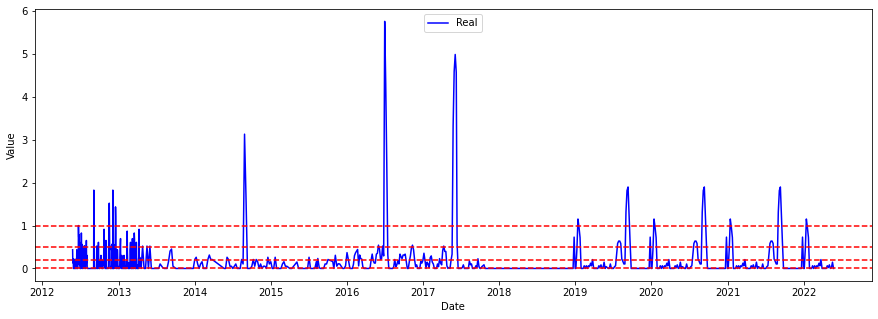

In [5]:
plt.figure(figsize=(15,5))
plt.plot(datain['Value'], color="b", label="Real")
plt.legend(loc=9)
plt.xlabel('Date')
plt.ylabel('Value')

# plot threshold lines
for thres in thresholds:
    plt.axhline(thres, color="r", linestyle='dashed')
    
# save
plt.savefig('thresholds.png')

# Random walks on Markov Graph

show one random walk in the future + its log-probability (not pure probability to avoid underflow)

In [6]:
states_dict

{'0': array([-inf,   0.]),
 '1': array([0. , 0.2]),
 '2': array([0.2, 0.5]),
 '3': array([0.5, 1. ]),
 '4': array([ 1., inf])}

In [7]:
utils_markov.random_walk_weighted(100, markov, observed_states)

{'log_prob': -82.85186279443732,
 'path': array([1, 1, 2, 2, 2, 2, 2, 3, 4, 2, 1, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 1, 1, 1, 1, 3, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 2, 3, 3, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 3, 1, 1, 4, 4, 2, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2], dtype=int64)}

# Predict probability at a future point using power of Markov matrix

In [169]:
# transition from last state to state i
# n_ahead = 1
n_ahead = 50
last_state = observed_states[-1]
print('Last state:', last_state)

ahead_markov = np.linalg.matrix_power(markov, n_ahead)
print('At the %d-th point in the future:' % n_ahead)
for state in states_dict.keys():
    i = int(state)
    bound = (states_dict[state][0], states_dict[state][1])
    print(f'prob -> state %d: %.2f%% in (%.1f, %.1f)' 
          %(i, ahead_markov[last_state][i]*100, bound[0], bound[1]))

Last state: 1
At the 50-th point in the future:
prob -> state 0: 0.00% in (-inf, 0.0)
prob -> state 1: 71.86% in (0.0, 0.2)
prob -> state 2: 15.44% in (0.2, 0.5)
prob -> state 3: 9.08% in (0.5, 1.0)
prob -> state 4: 3.63% in (1.0, inf)
